## Montecarlo Simulation
This code generates a Montecarlo simulation for the equilibrium model of a household that chooses goods and housing consumption. Formally, the individuals $i$ face:

$\underset{c, h}{\max} \hspace{5pt} c_{i}^{1 - \gamma} (\phi h_{i}^R + h_{i}^I - \overline{H}_n^d)^{\gamma}$

s.t.
$c_i + r_nh_i^R + p_nh_i^I \leq w_i$

$\hspace{12pt} r_nh_i^R = R_{in}$

FOC for $h_{i}^{I*}$ is:

$ h_{i}^{I*} =  \frac{(1 - \gamma)}{\phi}(\bar{H}_n^d - R_i/r_n) + \frac{\gamma}{p_n}(w_i - R_i)  \hspace{10pt} (2) $

with:
$\overline{H}_n^d \equiv \frac{\upsilon}{d_{pi}^\theta}h_{p}$



In [1]:
#install.packages("truncnorm")
#install.packages("ggplot2")
#install.packages("psych")
library(truncnorm)
#library(ggplot2)
library(psych)
set.seed(9111995)

Warning message:
"package 'truncnorm' was built under R version 3.6.3"

#### Setting Parameters

In [2]:
#From BCentral + 0.1. It's possible to estimate this parameter as BC. gamma = (average expenditure in housing)/(average income)
gamma = 0.31

#Arbitrarily
upsilon = 0.5

theta = 1

phi =  15

#### Generating Data

In [3]:
#N° of obs
obs = 10000
#Months in a year
m = 12

#In $1000 units
#RM Log Rental price from BCentral = 103.000
R = rtruncnorm(n=obs, a=0, mean=103*m, sd=103*m*0.1)
#RM Wages from BCentral            = 529.000
w = rtruncnorm(n=obs, a=0, mean=529*m, sd=529*m*0.1)
#Price of extension 15UF/m2
p = 450


#In meters
#From d = 1 to d = 1000
d = runif(obs, 1, 1000)
#Social housing investment size (m2)
h_p = 10000
#Average house size (m2) from CNN
h_R = rtruncnorm(n=obs, a=0, mean=44, sd=44*0.1)
#Rental price per m2
r = R/h_R

In [4]:
#Sample description
Sample = matrix(c(R, w, d), ncol=3)
describe(Sample)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
X1,1,10000,1234.6013,123.1018,1233.8323,1234.5797,121.9212,736.627591,1634.5111,897.8835,-0.01535030,0.06916945,1.231018
X2,2,10000,6357.0025,639.9839,6359.5694,6357.4428,643.8830,4041.049096,8600.5615,4559.5125,-0.01919963,-0.06504678,6.399839
X3,3,10000,505.1843,287.9215,509.2887,505.8895,368.4226,1.031477,999.9667,998.9352,-0.01205276,-1.18986587,2.879215


### Calculate housing investment without intervention ($\overline{H}_n^d = 0$):

$ h_{i}^{I*} =  \frac{\gamma}{p}(w_i - R_i) - \frac{(1-\gamma)}{\phi}\frac{R}{r}$

#### Descripción de resultados

In [5]:
h_0 = (gamma/p*(w - R) - R*(1-gamma)/(phi*r))
print(paste("La inversión promedio en housing quality sin externalidades es", mean(h_0)))

[1] "La inversión promedio en housing quality sin externalidades es 1.50790472442267"


In [6]:
describe(h_0)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
X1,1,10000,1.507905,0.4943266,1.513648,1.507463,0.5003545,-0.1370652,3.284575,3.421641,0.00227568,-0.07510761,0.004943266


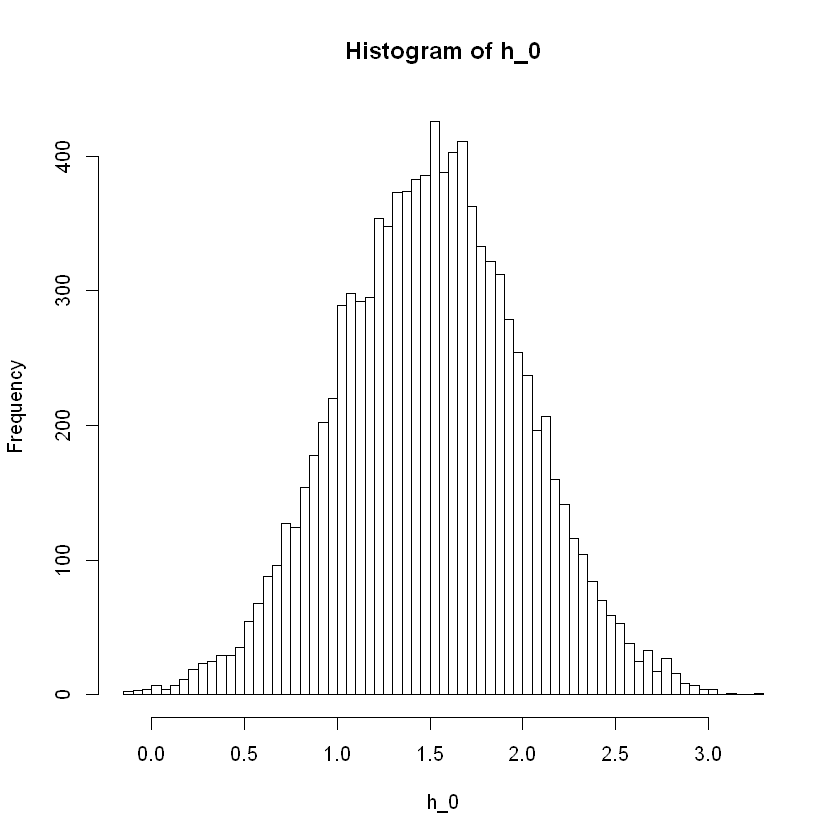

In [7]:
hist(h_0, breaks=length(h_0)/100, freq=TRUE)#, xlim = c(0,50)) 

### Calculate housing investment with intervention ($\overline{H}_n^d \neq 0$):

$ h_{i}^{I*} =  \frac{(1 - \gamma)}{\phi}(\bar{H}_n^d - R_i/r_n) + \frac{\gamma}{p_n}(w_i - R_i)  $

In [8]:
h_1 = (1-gamma)/phi*(upsilon*h_p/(d^theta) - R/r) + gamma/p*(w - R)
print(paste("La inversión promedio en housing quality con externalidades es", mean(h_1)))

[1] "La inversión promedio en housing quality con externalidades es 3.0765163763572"


#### Descripción de resultados

In [9]:
describe(h_1)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
X1,1,10000,3.076516,7.497174,2.125875,2.200118,0.7077553,0.1313112,224.2853,224.154,16.86928,353.5956,0.07497174


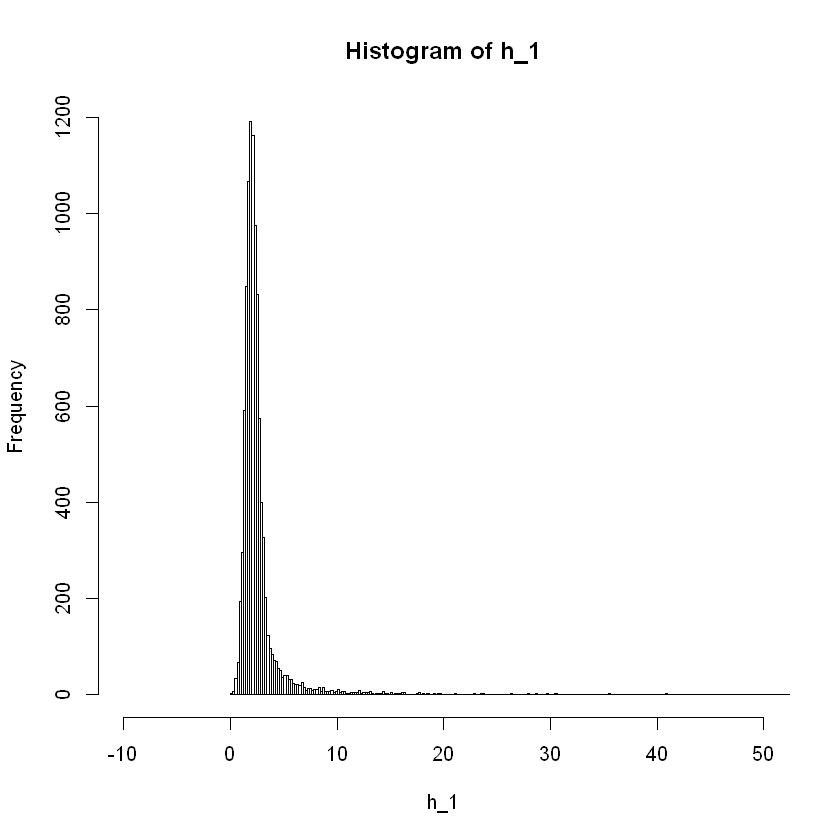

In [10]:
hist(h_1, breaks=length(h_1)/10, freq=TRUE, xlim=c(-10,50))#, xlim = c(0,50)) 

### Externalities effects

Now we calculate the housing externalities measured as the change of investment due to the intervention.

$\Delta h  = h_i - h_i^0 $

In [11]:
delta = h_1 - h_0
describe(delta)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
X1,1,10000,1.568612,7.479631,0.4516102,0.6158757,0.2735464,0.2300077,222.9812,222.7512,16.98367,356.9192,0.07479631


### Plot

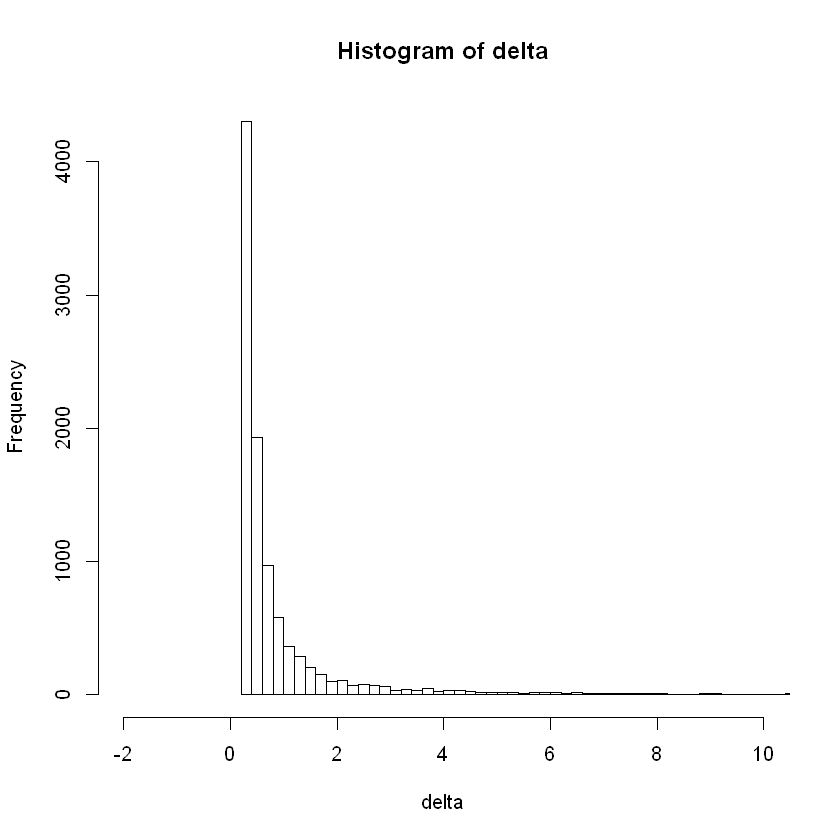

In [12]:
hist(delta, breaks=length(h_1)/10, freq=TRUE, xlim = c(-2,10)) #

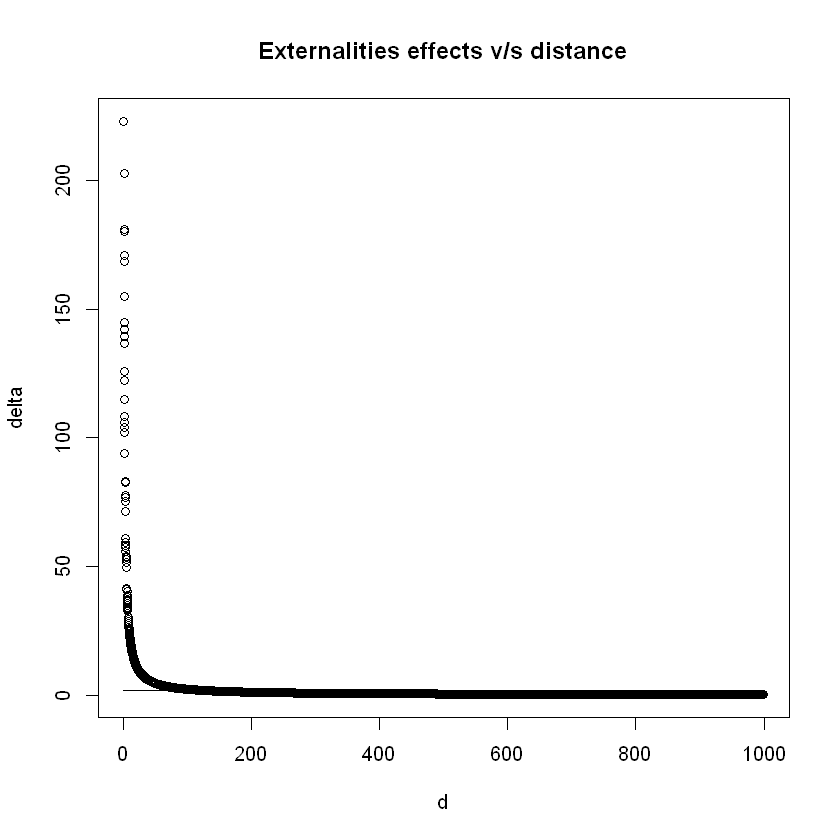

In [13]:
scatter.smooth(x=d, y=delta, main="Externalities effects v/s distance")

### Linear Regression

In [14]:
#library(tidyverse)
Model2 = lm(h_1 ~ h_0 + d)
summary(Model2)


Call:
lm(formula = h_1 ~ h_0 + d)

Residuals:
    Min      1Q  Median      3Q     Max 
 -2.560  -1.954  -0.769   0.691 218.002 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.9195045  0.2638106  18.648  < 2e-16 ***
h_0          1.0511257  0.1460788   7.196 6.67e-13 ***
d           -0.0067856  0.0002508 -27.056  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.221 on 9997 degrees of freedom
Multiple R-squared:  0.07259,	Adjusted R-squared:  0.0724 
F-statistic: 391.2 on 2 and 9997 DF,  p-value: < 2.2e-16


## Parameter estimation

We estimate the parameters by regressing the FOC:

1 ) Estimate $\phi$ from FOC with $\overline{H}_n^d = 0$, $\gamma = \bar{r}/\bar{w}$, and $h_r = N(44, 4.4)$ (Aquí tuve que convertir h_r de un valor fijo 44 a v.a. con media 44 para poder estimar el beta asociado al segundo termino y despejar $\phi$).

$ h_{i}^{I*} =  \frac{\gamma}{p}(w_i - R_i) - \frac{(1-\gamma)}{\phi}\frac{R}{r} \Rightarrow$

OLS: $ h_{i}^{I*} =  \beta_1 \frac{\gamma}{p}(w_i - R_i) - \beta_2(1-\gamma)h_R$. 

With $\beta_2 = -1/\phi$.

- $\beta_1$ must be close to 1.
- We should be able to recover the value of $\phi$, such that $\hat{\phi} = \phi$. 
- Intercept should be close to 0.

In [15]:
x1 = gamma/p*(w-R)
x2 = (1-gamma)*h_R
Param1 = lm(h_0 ~ x1 + x2)
summary(Param1)


Call:
lm(formula = h_0 ~ x1 + x2)

Residuals:
       Min         1Q     Median         3Q        Max 
-7.450e-16 -1.650e-16 -2.000e-17  1.260e-16  1.612e-13 

Coefficients:
              Estimate Std. Error    t value Pr(>|t|)    
(Intercept)  1.705e-15  2.096e-16  8.137e+00 4.55e-16 ***
x1           1.000e+00  3.627e-17  2.757e+16  < 2e-16 ***
x2          -6.667e-02  5.392e-18 -1.236e+16  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.628e-15 on 9997 degrees of freedom
Multiple R-squared:      1,	Adjusted R-squared:      1 
F-statistic: 4.612e+32 on 2 and 9997 DF,  p-value: < 2.2e-16


In [16]:
beta_x2 = coef(Param1)["x2"]
phi_est = 1/beta_x2

print(paste('El phi estimado corresponde a', mean(phi_est)))

[1] "El phi estimado corresponde a -15"


# $\checkmark$

2) Estimate  $\upsilon$ and $\theta$ from:

$ h_{i}^{I*} =  \frac{(1 - \gamma)}{\phi}(\frac{\upsilon}{d_{pi}^\theta}h_{p} - R_i/r_n) + \frac{\gamma}{p_n}(w_i - R_i) \hspace{10pt} (*) \Rightarrow$

OLS: $ h_{i}^{I*} =  \beta_1d_{pi}^{-\theta}\frac{(1 - \gamma)}{\phi}h_{p} - \beta_2\frac{(1 - \gamma)}{\phi}R_i/r_n + \beta_3\frac{\gamma}{p_n}(w_i - R_i)$

With $\beta_1 = \upsilon$.

- $\beta_2$ must be close to -1.
- $\beta_3$ must be close to 1.



In [19]:
x3 = (1-gamma)*h_p/(phi*d) 
x4 = (1-gamma)/phi*R/r
x5 = gamma/p*(w-R)

Param2 = lm(h_1 ~ x3 + x4 + x5)
summary(Param2)

Warning message in summary.lm(Param2):
"essentially perfect fit: summary may be unreliable"


Call:
lm(formula = h_1 ~ x3 + x4 + x5)

Residuals:
       Min         1Q     Median         3Q        Max 
-2.338e-14 -2.300e-16 -5.000e-17  1.300e-16  4.239e-13 

Coefficients:
              Estimate Std. Error    t value Pr(>|t|)    
(Intercept)  3.979e-15  6.159e-16  6.460e+00  1.1e-10 ***
x3           5.000e-01  3.198e-18  1.564e+17  < 2e-16 ***
x4          -1.000e+00  2.377e-16 -4.207e+15  < 2e-16 ***
x5           1.000e+00  1.066e-16  9.381e+15  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.783e-15 on 9996 degrees of freedom
Multiple R-squared:      1,	Adjusted R-squared:      1 
F-statistic: 8.189e+33 on 3 and 9996 DF,  p-value: < 2.2e-16


3) Using $\upsilon = \hat{\upsilon}$ and $\theta = \hat{\theta}$ estimate $\hat{\phi}$ from ($*$) and check consistency.

$ h_{i}^{I*} =  \frac{(1 - \gamma)}{\phi}(\frac{\upsilon}{d_{pi}^\theta}h_{p} - R_i/r_n) + \frac{\gamma}{p_n}(w_i - R_i) \hspace{10pt} (*) \Rightarrow$

OLS: $ \beta_1(1 - \gamma)(\frac{\upsilon}{d_{pi}^\theta}h_{p} - R_i/r_n) + \beta_2\frac{\gamma}{p_n}(w_i - R_i) $

With $\beta_1 = 1/\phi$.

- $\beta_2$ must be 1.

In [21]:
x6 = (1-gamma)*(upsilon/d*h_p - R/r) 
x7 = gamma/p*(w-R)
Param3 = lm(h_1 ~ x6 + x7)
summary(Param3)

Warning message in summary.lm(Param3):
"essentially perfect fit: summary may be unreliable"


Call:
lm(formula = h_1 ~ x6 + x7)

Residuals:
       Min         1Q     Median         3Q        Max 
-2.375e-13 -1.360e-16  9.000e-18  1.590e-16  2.031e-13 

Coefficients:
             Estimate Std. Error   t value Pr(>|t|)    
(Intercept) 2.203e-15  2.611e-16 8.437e+00   <2e-16 ***
x6          6.667e-02  2.935e-19 2.271e+17   <2e-16 ***
x7          1.000e+00  7.338e-17 1.363e+16   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.293e-15 on 9997 degrees of freedom
Multiple R-squared:      1,	Adjusted R-squared:      1 
F-statistic: 2.591e+34 on 2 and 9997 DF,  p-value: < 2.2e-16


In [23]:
print(paste('phi hat is equal to:', 1/coef(Param3)["x6"]))

[1] "phi hat is equal to: 15"


# FIN

#### References
BCentral : https://si2.bcentral.cl/public/pdf/documentos-trabajo/pdf/dtbc781.pdf

CNN: https://www.cnnchile.com/coronavirus/hogares-vitacura-18-mts2-puente-alto_20200413/